In [5]:
#imports libraries and data.

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn import *

data = pd.read_excel('./data/example_failure_data_sets.xlsx', sheet_name="SYS1")
data

,FN,IF,FT
0,1,3,3
1,2,30,33
2,3,113,146
3,4,81,227
4,5,115,342
...,...,...,...
131,132,648,76057
132,133,5485,81542
133,134,1160,82702
134,135,1864,84566


In [53]:
#creates the training data portion which just grabs the first cut of data. Can change train size.

train_size = 0.9

short_data = pd.DataFrame()
short_data["FT"] = data["FT"][:int(train_size*len(data["FT"]))]
short_data['FN'] = data["FN"][:int(train_size*len(data["FN"]))]

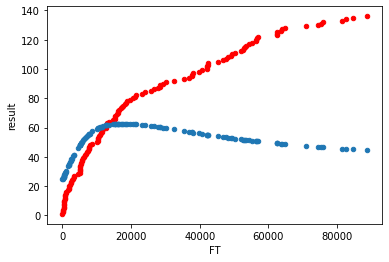

In [54]:
#gets metrics and graph for specified model trained on whatever portion of the data short_data is. 
# Can uncomment metrics for more info

#mod = ensemble.RandomForestRegressor()
mod = svm.SVR( kernel="sigmoid")
#mod = linear_model.LinearRegression()

# mod3 = neighbors.KNeighborsRegressor(n_neighbors=7, weights='uniform')
# # mod3 = linear_model.LinearRegression()
# mod2 = ensemble.RandomForestRegressor()
# mod1 = svm.SVR()
# mod = ensemble.VotingRegressor(estimators=[("svr", mod1), ("RFR", mod2), ("linear", mod3)])

mod.fit(short_data[["FT"]],short_data["FN"])

result = mod.predict(data[['FT']])

# print(metrics.r2_score(result, data['FN']))

# print(metrics.r2_score(result[len(short_data)-1:], data['FN'][len(short_data)-1:]))

# print( result[len(short_data)-1:])
# print("\n", data['FN'][len(short_data)-1:] )

data['result'] = result
plt = data.plot.scatter(x='FT', y='FN', c='red') #red is true val
data.plot.scatter(x='FT',y='result', ax=plt) #blue is predicted

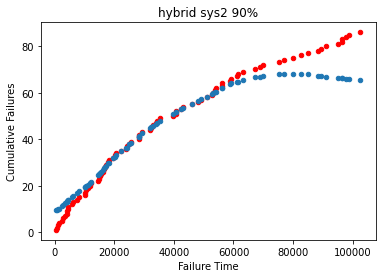

In [52]:
#trains and tests the specified model and creates a graph. Currently trains on first 90% of data, tests on all.

mod = ensemble.VotingRegressor(estimators=[("svr", mod1), ("RFR", mod2), ("knn", mod3)])
# mod = ensemble.RandomForestRegressor()

sys_data = pd.read_excel('./data/example_failure_data_sets.xlsx', sheet_name="SYS2")

mod.fit(sys_data[["FT"]][0:int(len(sys_data["FT"])*.9)],  sys_data["FN"][0:int(len(sys_data["FT"])*.9)] )

sys_data["result"] =  mod.predict(sys2_data[["FT"]])

plt = sys_data.plot.scatter(x="FT", y="FN", c="red")
plt = sys_data.plot.scatter(x="FT", y="result", ax = plt, title="hybrid sys2 90%")
plt.set_xlabel("Failure Time")
plt.set_ylabel("Cumulative Failures")
plt.get_figure().savefig("hybrid sys2 90.png")

In [34]:
#linear regression coef calculation method. Can insert data into the method and train 
# then use those coef with a linear model. Can change to make more effecient but wanted it to be explicit

def calc_coef(x, y): 
        assert len(x) == len(y)
        n = len(x)  
        x_mean = np.mean(x)
        cov = np.sum(y*x)/n - x_mean*np.mean(y) 
        var = np.sum(x*x)/n - x_mean **2
        m = cov / var 
        b = np.mean(y) - m*x_mean 
        print(b,m)
        return(b, m)

In [35]:
(b,m) = calc_coef(short_data["FT"],short_data["FN"])



25.501052501848726 0.0018680873938161844
